In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import joblib

In [8]:
df = pd.read_csv(r"C:\DATA SCIENCE\PROJECT FOLDERS\prj_restaurant_recommendation\final_df.csv")
df.head()

,ID.No,NAME,CITY,RATING,Rating_Count,COST,CUISINE,License_No,LINK,ADDRESS,MENU
0,567335,Ab foods point,Abohar,0.0,5,200.0,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"Ab Foods Point, Near Rishi Narang Dental Clini...",Menu/567335.json
1,531342,Janta sweet house,Abohar,4.4,50,200.0,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,Theka coffee desi,Abohar,3.8,100,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"Theka Coffee Desi, Sahtiya Sadan Road City",Menu/158203.json
3,187912,Singh hut,Abohar,3.7,20,250.0,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, Circular Road Near Nehru Park Abohar",Menu/187912.json
4,543530,Grill masters,Abohar,0.0,5,250.0,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"Grill Masters, Ada Heights, Abohar - Hanumanga...",Menu/543530.json


In [10]:
df.head()

,ID.No,NAME,CITY,RATING,Rating_Count,COST,CUISINE,License_No,LINK,ADDRESS,MENU
0,567335,Ab foods point,abohar,0.0,5,200.0,"beverages,pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"Ab Foods Point, Near Rishi Narang Dental Clini...",Menu/567335.json
1,531342,Janta sweet house,abohar,4.4,50,200.0,"sweets,bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,Theka coffee desi,abohar,3.8,100,100.0,beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"Theka Coffee Desi, Sahtiya Sadan Road City",Menu/158203.json
3,187912,Singh hut,abohar,3.7,20,250.0,"fast food,indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, Circular Road Near Nehru Park Abohar",Menu/187912.json
4,543530,Grill masters,abohar,0.0,5,250.0,"italian-american,fast food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"Grill Masters, Ada Heights, Abohar - Hanumanga...",Menu/543530.json


In [3]:
df.columns

Index(['ID.No', 'NAME', 'CITY', 'RATING', 'Rating_Count', 'COST', 'CUISINE',
       'License_No', 'LINK', 'ADDRESS', 'MENU'],
      dtype='object')

In [9]:
# Normalize user input
df['CITY'] = df['CITY'].str.lower()
df['CUISINE'] = df['CUISINE'].str.lower()

In [14]:
df.dtypes

ID.No             int64
NAME             object
CITY             object
RATING          float64
Rating_Count      int64
COST            float64
CUISINE          object
License_No       object
LINK             object
ADDRESS          object
MENU             object
cluster           int32
dtype: object

PREPROCESSING

In [11]:
# Import Libraries
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import joblib



# Step 2: Define Columns
num_cols = ['RATING', 'Rating_Count', 'COST']
cat_cols = ['NAME', 'CITY','CUISINE']

# Step 3: Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_cols)
])

# Step 4: Transform Data
X_processed = preprocessor.fit_transform(df)

from sklearn.impute import SimpleImputer

# After preprocessor and before SVD
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_processed)

# Save imputer
joblib.dump(imputer, r'C:\DATA SCIENCE\PROJECT FOLDERS\prj_restaurant_recommendation\imputer.pkl')

# Then apply SVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(X_imputed)





K - MEANS CLUSTERING

In [12]:
# Step 6: Fit KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_reduced)

# Step 7: Add Cluster Info
df['cluster'] = kmeans.labels_

# Step 8: Save Preprocessor and Model
joblib.dump(preprocessor, r'C:\DATA SCIENCE\PROJECT FOLDERS\prj_restaurant_recommendation\preprocessor.pkl')
joblib.dump(svd, r'C:\DATA SCIENCE\PROJECT FOLDERS\prj_restaurant_recommendation\svd_model.pkl')
joblib.dump(kmeans, r'C:\DATA SCIENCE\PROJECT FOLDERS\prj_restaurant_recommendation\kmeans_model.pkl')

# Step 9: Save Final DataFrame (Optional)
df.to_csv("C:\DATA SCIENCE\PROJECT FOLDERS\prj_restaurant_recommendation\clustered.csv", index=False)


<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
C:\Users\123\AppData\Local\Temp\ipykernel_14800\4101048095.py:14: SyntaxWarning: invalid escape sequence '\D'
  df.to_csv("C:\DATA SCIENCE\PROJECT FOLDERS\prj_restaurant_recommendation\clustered.csv", index=False)


ELBOW METHOD

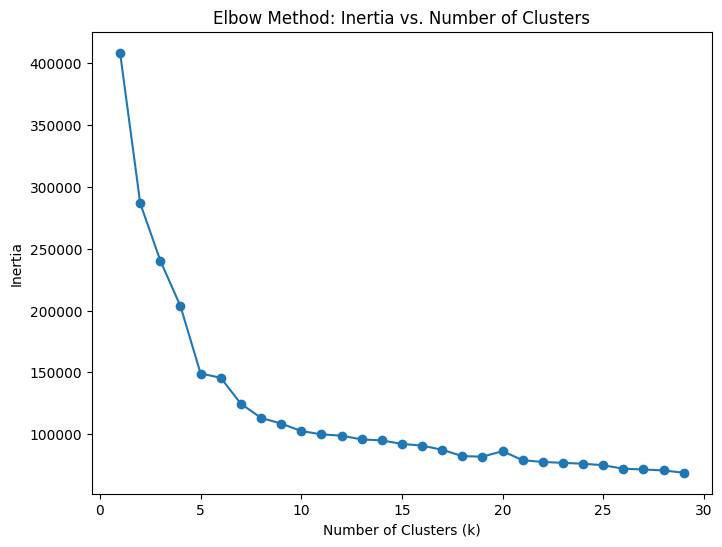

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Calculate Inertia for different values of k
inertia = []
k_range = range(1, 30)  # You can adjust this range based on your dataset

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)  # X_reduced is your data after preprocessing and dimensionality reduction
    inertia.append(kmeans.inertia_)

# Step 2: Plot Elbow graph
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


SILHOUETTE SCORE VISUALS

[np.float64(0.42625117223450326), np.float64(0.4291150166403302), np.float64(0.44733288391457654), np.float64(0.3381145196788299), np.float64(0.294788877844663), np.float64(0.31562912427082296), np.float64(0.3422810722524064), np.float64(0.22286833899750721), np.float64(0.20709966132344967), np.float64(0.2084654715964767), np.float64(0.19339416647835433), np.float64(0.20975509538771114), np.float64(0.1881837294628137), np.float64(0.2006873020284679), np.float64(0.21634476622852206), np.float64(0.2164893769947069), np.float64(0.21634679553474662), np.float64(0.16863898204660888), np.float64(0.21825246338505472), np.float64(0.22896454229026567), np.float64(0.2355286111353453), np.float64(0.20251934638849062), np.float64(0.2139161176075465), np.float64(0.1823901961685338), np.float64(0.2090087679470487), np.float64(0.2043054312761205), np.float64(0.19883958283332936), np.float64(0.2397235291720968)]


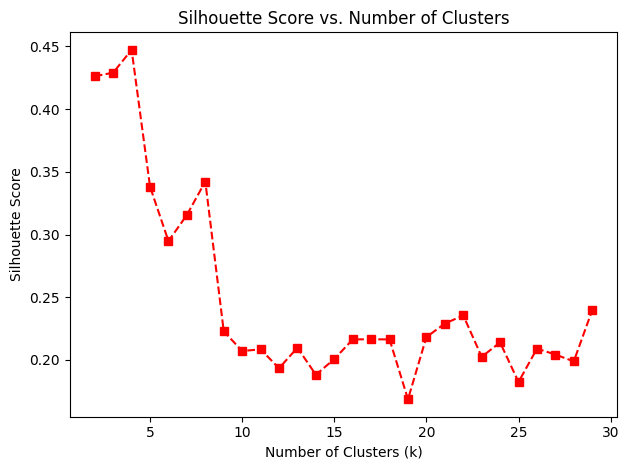

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# X_reduced = your reduced dataset

silhouette_scores = []
cluster_range = range(2, 30)

# Use a fixed random sample size (e.g., 1000 points)
sample_size = min(1000, len(X_reduced))  # Don't exceed actual data size

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300,
                    tol=0.0001, random_state=111, algorithm='elkan')
    kmeans.fit(X_reduced)
    
    # Sampled silhouette score (faster)
    score = silhouette_score(X_reduced, kmeans.labels_, sample_size=sample_size, random_state=111)
    silhouette_scores.append(score)

print(silhouette_scores)

plt.plot(cluster_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.tight_layout()
plt.show()



In [13]:
df['NAME'].isnull().sum()

np.int64(0)